# Capstone Project 1: Data Story

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [38]:
df = pd.read_excel('https://query.data.world/s/s3t37yqxxeoabyocyh6g33fojskwvq', skiprows = 3)
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
Survey Year                             6893 non-null int64
Timestamp                               6893 non-null datetime64[ns]
SalaryUSD                               6893 non-null object
Country                                 6893 non-null object
PostalCode                              5934 non-null object
PrimaryDatabase                         6893 non-null object
YearsWithThisDatabase                   6893 non-null int64
OtherDatabases                          5520 non-null object
EmploymentStatus                        6893 non-null object
JobTitle                                6893 non-null object
ManageStaff                             6893 non-null object
YearsWithThisTypeOfJob                  6893 non-null int64
HowManyCompanies                        6893 non-null object
OtherPeopleOnYourTeam                   6893 non-null object
CompanyEmployeesOverall           

In [40]:
#Fill in NaN values in "Education IsComputerRelated" with Mode
df['EducationIsComputerRelated'] = df['EducationIsComputerRelated'].fillna(df['EducationIsComputerRelated'].mode()[0])

In [41]:
# Find typo data in SalaryUSD
df.SalaryUSD[df.SalaryUSD == '50 621'].index.tolist()

df.loc[5968, 'SalaryUSD'] = 50621
df.loc[6123, 'SalaryUSD'] = 110000
df.loc[6419, 'SalaryUSD'] = 66000

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [43]:
df.describe()

,Survey Year,YearsWithThisDatabase,YearsWithThisTypeOfJob,DatabaseServers,HoursWorkedPerWeek,Counter
count,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.0
mean,2017.707529,24.582475,7.169882,256.346729,43.165095,1.0
std,0.680375,744.828893,6.330862,6261.023007,7.030034,0.0
min,2017.000000,0.000000,0.000000,0.000000,3.000000,1.0
25%,2017.000000,6.000000,3.000000,6.000000,40.000000,1.0
50%,2018.000000,10.000000,5.000000,20.000000,40.000000,1.0
75%,2018.000000,15.000000,10.000000,70.000000,45.000000,1.0
max,2019.000000,53716.000000,40.000000,500000.000000,200.000000,1.0


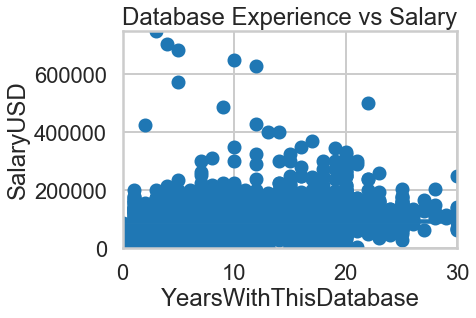

In [62]:
plt.scatter(df.YearsWithThisDatabase, df.SalaryUSD)
plt.xlabel("Database Experience (Year)")
plt.ylabel("Salary (USD)")
plt.title("Database Experience vs Salary")
plt.xlim(0, 30)
plt.ylim(0, 750000)
sns.regplot(y="SalaryUSD", x="YearsWithThisDatabase", data=df, fit_reg = True)

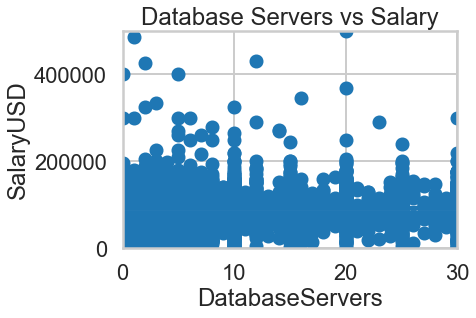

In [63]:
plt.scatter(df.DatabaseServers, df.SalaryUSD)
plt.xlabel("Number of Database Servers")
plt.ylabel("Salary (USD)")
plt.title("Database Servers vs Salary")
plt.xlim(0, 30)
plt.ylim(0, 500000)
sns.regplot(y="SalaryUSD", x="DatabaseServers", data=df, fit_reg = True)

Text(0.5, 1.0, 'Job Experience vs Salary')

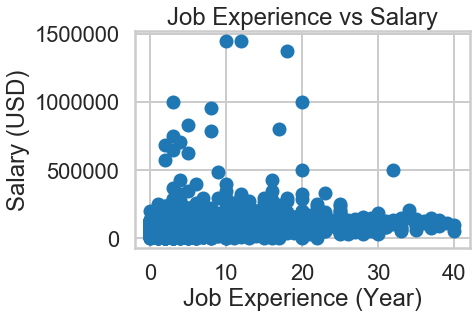

In [44]:
plt.scatter(df.YearsWithThisTypeOfJob, df.SalaryUSD)
plt.xlabel("Job Experience (Year)")
plt.ylabel("Salary (USD)")
plt.title("Job Experience vs Salary")

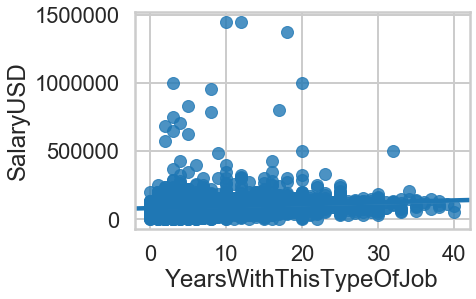

In [45]:
sns.regplot(y="SalaryUSD", x="YearsWithThisTypeOfJob", data=df, fit_reg = True)

In [46]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.YearsWithThisTypeOfJob, df.SalaryUSD)
print(corr)

0.15503216328149738


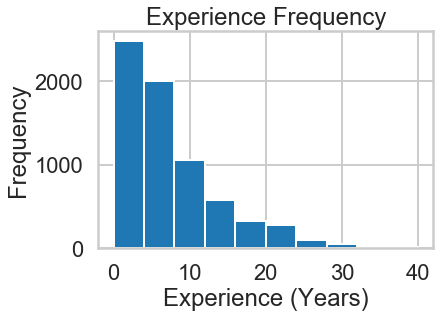

In [47]:
plt.hist((df.YearsWithThisTypeOfJob))
plt.title("Experience Frequency")
plt.xlabel("Experience (Years)")
plt.ylabel("Frequency")
plt.show()

### Most of data professionals had experience between 0 and 6 years. 

### There is a weak correlation of 0.15503 between Experience and Salary, which means that the salary of data professionals do not increase significantly with the factor of experience. There is a weak increasing trend, meaning that their salary will go up slightly as they get more experience.

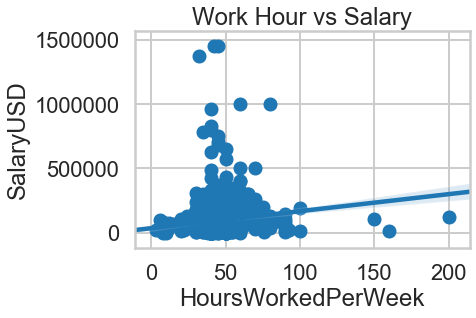

In [48]:
plt.scatter(df.HoursWorkedPerWeek, df.SalaryUSD)
plt.xlabel("Weekly Work Hour")
plt.ylabel("Salary (USD)")
plt.title("Work Hour vs Salary")
sns.regplot(y="SalaryUSD", x="HoursWorkedPerWeek", data=df, fit_reg = True)

In [49]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.HoursWorkedPerWeek, df.SalaryUSD)
print(corr)

0.16095889283100823


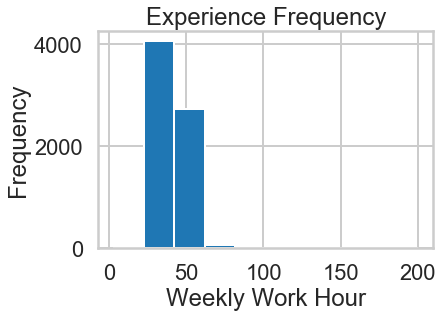

In [50]:
plt.hist((df.HoursWorkedPerWeek))
plt.title("Experience Frequency")
plt.xlabel("Weekly Work Hour")
plt.ylabel("Frequency")
plt.show()

### Most data professionals worked around 40 to 55 hours per week.

### There is a weak correlation of 0.16096 between Work Hour and Salary, which means that the salary of data professionals do not increase significantly with the factor of hour. However, based on the scatter plot, most frequent work hour is between 40 and 50 per week. As they work more hour, the salary increases, but not too significantly.

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

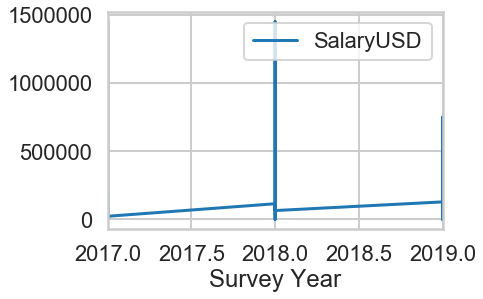

In [52]:
ax = plt.gca()
df.plot(kind='line',x='Survey Year',y='SalaryUSD',ax=ax)
plt.show()

### In general, salary increased in yearly unit.

### Lastly, as expected, both models we can infer that there is a weak, positive correlation between Experience (Years) and Salary, also between Work Hour (per week) and Salary.